## Free Energy Plots, varying Grid Sizes

The following cell plots the free energy of the system from benchmark problem 1a as a function  of time, for a particular grid size and spacing: a side length of 200, with a spacing of 0.5.

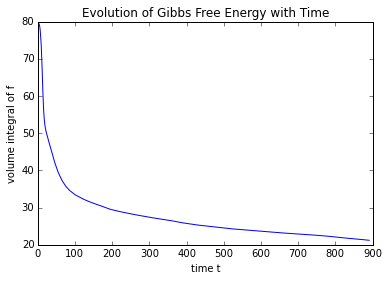

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1)
plt.xlabel('time t')
plt.ylabel('volume integral of f')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.plot(np.loadtxt('1a100x2.0.txt', usecols = [0]), np.loadtxt('1a100x2.0.txt', usecols = [1]))
plt.show()

# plt.plot(np.loadtxt('1b.txt', usecols = [0]), np.loadtxt('1b.txt', usecols = [1]))
# plt.plot(np.loadtxt('1c.txt', usecols = [0]), np.loadtxt('1c.txt', usecols = [1]))

This next plot overlays free energy curves for the same problem, for various grid sizes.
The maximum time to which the data is plotted is controlled by the "duration" variable below. This was necessary since some grid sizes were run to different durations than others.

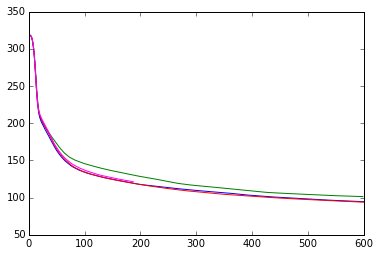

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

duration = 600

times = np.loadtxt('1a50x4.0.txt', usecols = [0])
times50x4 = times[times < duration]
vals = np.loadtxt('1a50x4.0.txt', usecols = [1])
vals50x4 = vals[times < duration]

times = np.loadtxt('1a100x2.0.txt', usecols = [0])
times100x2 = times[times < duration]
vals = np.loadtxt('1a100x2.0.txt', usecols = [1])
vals100x2 = vals[times < duration]

times = np.loadtxt('1a200x1.0.txt', usecols = [0])
times200x1 = times[times < duration]
vals = np.loadtxt('1a200x1.0.txt', usecols = [1])
vals200x1 = vals[times < duration]

times = np.loadtxt('1a400x0.5.txt', usecols = [0])
times400x5 = times[times < duration]
vals = np.loadtxt('1a400x0.5.txt', usecols = [1])
vals400x5= vals[times < duration]

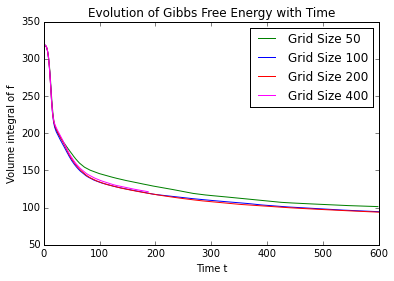

In [93]:
plt.figure(2)
plt.xlabel('Time t')
plt.ylabel('Volume integral of f')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.plot(times50x4, 16.0*vals50x4, 'g', label = 'Grid Size 50')
plt.plot(times100x2, 4.0*vals100x2, 'b', label = 'Grid Size 100')
plt.plot(times200x1, vals200x1, 'r', label = 'Grid Size 200')
plt.plot(times400x5, 0.25*vals400x5, 'magenta', label = 'Grid Size 400')
plt.legend(loc='best')
plt.show()

In [69]:
from scipy.interpolate import interp1d

ideal_times = []
for i in range (180):
    ideal_times.append(i)

In [70]:
print times50x4

[  0.00000000e+00   1.00000000e-02   2.10000000e-02   3.31000000e-02
   4.64100000e-02   6.10510000e-02   7.71561000e-02   9.48717100e-02
   1.14358881e-01   1.35794769e-01   1.59374246e-01   1.85311671e-01
   2.13842838e-01   2.45227121e-01   2.79749834e-01   3.17724817e-01
   3.59497299e-01   4.05447028e-01   4.55991731e-01   5.11590904e-01
   5.72749995e-01   6.40024994e-01   7.14027494e-01   7.95430243e-01
   8.84973268e-01   9.83470594e-01   1.09181765e+00   1.21099942e+00
   1.34209936e+00   1.48630930e+00   1.64494023e+00   1.81943425e+00
   2.01137767e+00   2.22251544e+00   2.45476699e+00   2.71024368e+00
   2.99126805e+00   3.30039486e+00   3.64043434e+00   4.01447778e+00
   4.42592556e+00   4.87851811e+00   5.37636992e+00   5.92400692e+00
   6.52640761e+00   7.18904837e+00   7.91795321e+00   8.71974853e+00
   9.42532841e+00   1.02014663e+01   1.10552179e+01   1.18065194e+01
   1.26329510e+01   1.33602108e+01   1.41601966e+01   1.48641841e+01
   1.54836931e+01   1.60288610e+01

In [71]:
print np.loadtxt('1a400x0.5.txt', usecols = [0])

[  0.00000000e+00   1.00000000e-02   2.10000000e-02 ...,   1.88192450e+02
   1.88366136e+02   1.88518980e+02]


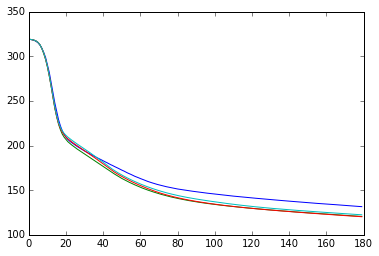

In [73]:
f50x4 = interp1d(times50x4, vals50x4)
f100x2 = interp1d(times100x2, vals100x2)
f200x1 = interp1d(times200x1, vals200x1)
f400x5 = interp1d(times400x5, vals400x5)

y50x4 = 16*f50x4(ideal_times)
y100x2 = 4*f100x2(ideal_times)
y200x1 = f200x1(ideal_times)
y400x5 = .25*f400x5(ideal_times)

plt.plot(ideal_times, y50x4, ideal_times, y100x2, ideal_times, y200x1, ideal_times, y400x5)
plt.show()

In [83]:
import numpy as np

diff_50_100 = []
diff_50_200 = []
diff_50_400 = []
diff_100_200 = []
diff_100_400 = []
diff_200_400 = []

for i in range (180):
    diff_50_100.append(np.absolute(y50x4[i]-y100x2[i]))
    diff_50_200.append(np.absolute(y50x4[i]-y200x1[i]))
    diff_50_400.append(np.absolute(y50x4[i]-y400x5[i]))
    diff_100_200.append(np.absolute(y100x2[i]-y200x1[i]))
    diff_100_400.append(np.absolute(y100x2[i]-y400x5[i]))
    diff_200_400.append(np.absolute(y200x1[i]-y400x5[i]))

In [85]:
print np.linalg.norm(diff_50_100, 1)
print np.linalg.norm(diff_50_200, 1)
print np.linalg.norm(diff_50_400, 1)
print np.linalg.norm(diff_100_200, 1)
print np.linalg.norm(diff_100_400, 1)
print np.linalg.norm(diff_200_400, 1)

1638.73022403
1504.46320049
1211.11659941
173.206675964
501.183649586
352.875457302


In [86]:
print np.linalg.norm(diff_50_100, 2)
print np.linalg.norm(diff_50_200, 2)
print np.linalg.norm(diff_50_400, 2)
print np.linalg.norm(diff_100_200, 2)
print np.linalg.norm(diff_100_400, 2)
print np.linalg.norm(diff_200_400, 2)

130.65529684
124.966516583
99.6754732132
19.7755720924
41.347418316
27.5598281536


In [88]:
print np.linalg.norm(diff_50_100, np.inf)
print np.linalg.norm(diff_50_200, np.inf)
print np.linalg.norm(diff_50_400, np.inf)
print np.linalg.norm(diff_100_200, np.inf)
print np.linalg.norm(diff_100_400, np.inf)
print np.linalg.norm(diff_200_400, np.inf)

11.7392801434
11.7854671741
9.70674808615
3.65170483549
5.67204064247
2.69887150197


norms: L1 (|f_100-f_200|), L2 = SUM (f_100-f_200)^2 -->scipy interpolate

In [55]:
print times50x4[40:50]
print times100x2[40:50]

[  4.42592556   4.87851811   5.37636992   5.92400692   6.52640761
   7.18904837   7.91795321   8.71974853   9.42532841  10.20146628]
[  4.42592556   4.87851811   5.37636992   5.92400692   6.52640761
   7.18904837   7.91795321   8.71974853   9.42532841  10.0462387 ]


In [5]:
np.loadtxt('1a50x4.0.txt', usecols = [1])

array([ 19.93991924,  19.93977373,  19.93961304, ...,   3.62729153,
         3.62724293,   3.62719959])

In [8]:
times = np.loadtxt('1a50x4.0.txt', usecols = [0])

In [9]:
times_reduced = times[times < 2000]

In [10]:
times_reduced

array([  0.00000000e+00,   1.00000000e-02,   2.10000000e-02, ...,
         1.99609493e+03,   1.99778186e+03,   1.99963747e+03])

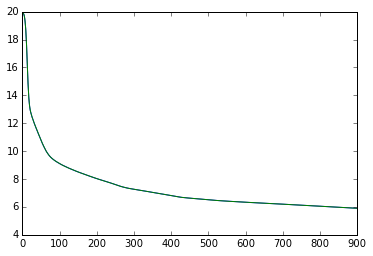

In [39]:
from scipy.interpolate import interp1d

ideal_times = []
for i in range (900):
    ideal_times.append(i)

f = interp1d(times50x4, vals50x4)
y_interp = f(ideal_times)
plt.plot(times50x4, vals50x4)
plt.plot(ideal_times, y_interp)
plt.show()

In [34]:
from scipy.interpolate import interp1d

x = np.array([0., 0.5, 2.0, 2.5])
x_interp = np.array([1.0, 1.5])
y = x**2

f = interp1d(x, y)
y_interp = f(x_interp)

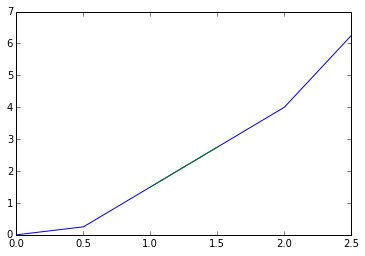

In [35]:
plt.plot(x, y)
plt.plot(x_interp, y_interp)
plt.show()